In [1]:
# General import
import numpy as np
from numpy.fft import fft2, ifft2, fftshift
from scipy.signal import convolve2d
from scipy.signal import fftconvolve
import matplotlib.pyplot as plt
%matplotlib inline
# Local import
from Codes.dataprocess import DataGen
from Codes.dataprocess import Export_ep
from Codes.algoviolet import violetBD
from Codes.display import Display_ker
from Codes.display import Display_im
from Codes.display import Display_epd
from Codes.myfunc import nablah
from Codes.myfunc import convolve
from Codes.simplex import Simplex
from Codes.fbstep import FBS_ker

# Estimation du Kernel K
## Estimation du niveau de régularisation

### Initialisation

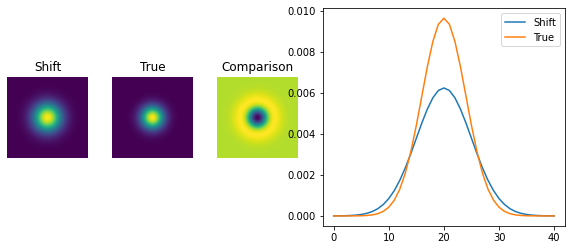

Erreur |Shift - True|/ |True| : 0.2811 


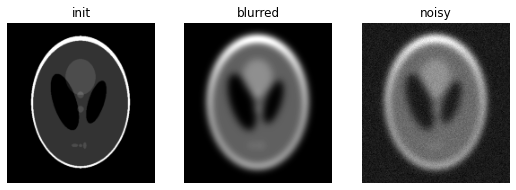

Erreur blurred |x_blurr- x_true|_2 :0.5683
Erreur |x_noisy - x_true|_2 :0.5725


In [2]:
K1, K2, x_im, x_b, x_o1 = DataGen()

In [3]:
# test de la dérivation
Nx,Ny  = x_im.shape
M      = K1.shape[0]//2
# Padding K
K1_pad = np.pad(K1, ((Nx//2-M,Nx//2-M),(Ny//2-M,Ny//2-M)),'constant')
K2_pad = np.pad(K2, ((Nx//2-M,Nx//2-M),(Ny//2-M,Ny//2-M)),'constant')
# Derivation
d      = np.zeros((3,3))
d[1,1] = 1
d_pad  = np.pad(d, ((Nx//2-1,Nx//2-1),(Ny//2-1,Ny//2-1)), 'constant')

### Image juste, kernel K shifté

In [4]:
alpha   = 0
mu      = 0.00
Kk      = K2_pad.copy()
x_in    = x_im.copy()
# E_0 = 1000
# for i in range(0,1000):
#     Kk = FBS_ker(x_in,Kk,x_b,d_pad,alpha,gamma=1,M=20,coeff=0.1,simplex=False)
#     E = np.linalg.norm(convolve(d_pad,convolve(d_pad,Kk)))
#     print(E)
#     if E<E_0:
#         E_0 = E
#     else:
#         break
#     plt.imshow(Kk)
# K_out = Kk[Nx//2-M:Nx//2+M+1,Ny//2-M:Ny//2+M+1]
# plt.imshow(K_out)  
# Display_ker(K1,K_out,mysize=(8,4))

### REAL GAME

In [5]:
np.linalg.norm(convolve(d_pad,Kk))

0.05642348473375487

In [6]:
# alpha     = 0.00
# mu        = 0.00
# K_in      = K2.copy()
# x_in      = x_im.copy()
# K_out,x_out,Ep22,Ed22 = violetBD(x_in,K_in,x_b,alpha,mu,\
#                             niter=1000,coeffK=0.1,coeffx=0,\
#                             proj_simplex=False)

In [7]:
# Display_ker(K_out,K1,mysize=(8,4))
# Display_ker(K_out,K2,mysize=(8,4))
# Display_epd(Ep22,Ed22)

### RECHERCHE PARAMETRE ALPHA

In [13]:
alpha     = 500
mu        = 0.005
K_in      = K2.copy()
x_in      = x_im.copy()
K_out,x_out,Ep22,Ed22 = violetBD(x_in,K_in,x_o1,alpha,mu,\
                            niter=500,coeffK=1,coeffx=0,\
                            proj_simplex=False,verbose=False)

Final energy : 8.830023533453714


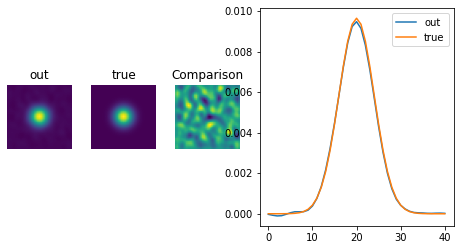

Erreur |out - true|/ |true| : 0.0337 


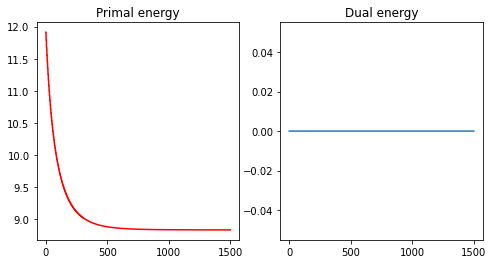

In [14]:
Display_ker(K_out,K1,mysize=(8,4),label1='out',label2='true')
Display_epd(Ep22,Ed22)